<a href="https://colab.research.google.com/github/utxu/TFM_food_recognition/blob/main/colab_Fine_Tuning_over_FEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=6a2a090441a1e5ec13dfa79b9e27fda753c03a78a67aa3ceb331f9057a4ad698
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.3 GB  | Proc size: 946.0 MB
GPU RAM Free: 14887MB | Used: 222MB | Util   1% | Total 15109MB


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd

/content


In [5]:
!ls -l

total 8
drwx------ 5 root root 4096 Jun  8 21:34 drive
drwxr-xr-x 1 root root 4096 Jun  1 13:40 sample_data


In [6]:
import os

# Location of Zip File
drive_path = '/content/drive/MyDrive/spanish_food_images.zip'
local_path = '/content'

# Copy the zip file and move it up one level (AKA out of the drive folder)
!cp '{drive_path}' .

# Navigate to the copied file and unzip it quietly
os.chdir(local_path)
!unzip -q 'spanish_food_images.zip'

In [7]:
# Vamos a borrar la copia del .zip porq lo tenemos en la ruta de 'My drive'
! rm -rf spanish_food_images.zip

In [8]:
from keras.applications.vgg16 import VGG16

In [9]:
conv_base = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 16,813,124
Trainable params: 16,813,124
Non-trainable params: 0
_________________________________________________________________


In [12]:
base_dir = '/content/spanish_food_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical')

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5), 
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)


Found 2000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 83s 347ms/step - loss: 1.0742 - acc: 0.5306 - val_loss: 0.5164 - val_acc: 0.7940
Epoch 2/30
100/100 [==============================] - 34s 338ms/step - loss: 0.5870 - acc: 0.7722 - val_loss: 0.5443 - val_acc: 0.7860
Epoch 3/30
100/100 [==============================] - 34s 337ms/step - loss: 0.4264 - acc: 0.8475 - val_loss: 0.4243 - val_acc: 0.8380
Epoch 4/30
100/100 [==============================] - 34s 338ms/step - loss: 0.3721 - acc: 0.8722 - val_loss: 0.5219 - val_acc: 0.8060
Epoch 5/30
100/100 [==============================] - 34s 338ms/step - loss: 0.3430 - acc: 0.8723 - val_loss: 0.3509 - val_acc: 0.8730
Epoch 6/30
100/100 [==============================] - 34s 337ms/step - loss: 0.3027 - acc: 0.8917 - val_loss: 0.3926 - val_acc: 0.8680
Epoch 7/30
100/100 [==============================] - 34s 338ms/step - loss: 0.2381 - acc: 0.9128 - val_loss: 0.2994 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 3

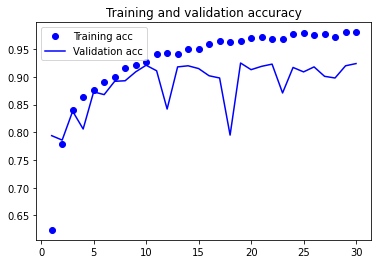

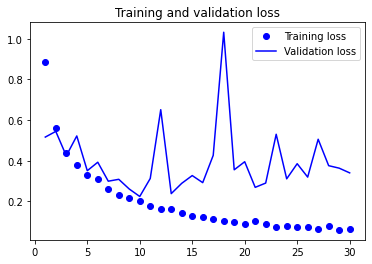

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# FINE - TUNING

In [16]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5), 
              metrics=['acc'])

history = model.fit_generator(
    train_generator, 
    steps_per_epoch=100, 
    epochs=100, 
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 33s 317ms/step - loss: 0.0195 - acc: 0.9960 - val_loss: 0.4065 - val_acc: 0.9310
Epoch 2/100
100/100 [==============================] - 31s 310ms/step - loss: 0.0148 - acc: 0.9945 - val_loss: 0.4059 - val_acc: 0.9350
Epoch 3/100
100/100 [==============================] - 31s 307ms/step - loss: 0.0121 - acc: 0.9957 - val_loss: 0.4413 - val_acc: 0.9330
Epoch 4/100
100/100 [==============================] - 31s 308ms/step - loss: 0.0077 - acc: 0.9955 - val_loss: 0.4817 - val_acc: 0.9320
Epoch 5/100
100/100 [==============================] - 31s 308ms/step - loss: 0.0114 - acc: 0.9977 - val_loss: 0.4677 - val_acc: 0.9320
Epoch 6/100
100/100 [==============================] - 31s 308ms/step - loss: 0.0087 - acc: 0.9974 - val_loss: 0.4661 - val_acc: 0.9320
Epoch 7/100
100/100 [==============================] - 31s 309ms/step - loss: 0.0040 - acc: 0.9986 - val_loss: 0.5050 - val_acc: 0.9350
Epoch 8/100
100/100 [===========================

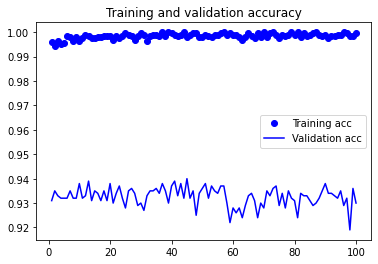

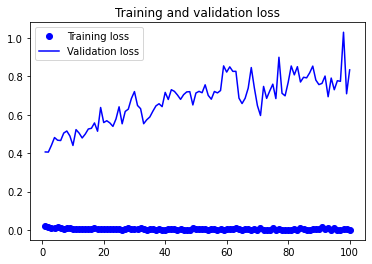

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()